Import Libraries:



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Load Dataset:

In [3]:
# Load the dataset
file_path = r'C:\Users\DELL\Downloads\Heart_Disease_Prediction.csv'
df = pd.read_csv(file_path)
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


 Data Cleaning:

In [4]:
# Check for missing values
df.isna().sum()

# Drop rows with missing values
df_cleaned = df.dropna()

# Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()

# Convert categorical variables to numerical (example provided for illustration)
# df_cleaned['categorical_column'] = pd.factorize(df_cleaned['categorical_column'])[0]

# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['Age', 'BP', 'Cholesterol', 'Max HR']
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

df_cleaned.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,2.4,2,3,3,Presence
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,1.6,2,0,7,Absence
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,0.3,1,0,7,Presence
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,0.2,2,1,7,Absence
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,0.2,1,1,3,Absence


Data Splitting:

In [5]:
# Define features (X) and target (y)
X = df_cleaned.drop('Heart Disease', axis=1)
y = df_cleaned['Heart Disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Model Training:

In [6]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Model Evaluation
Predict and Evaluate:

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Accuracy: 0.89
Confusion Matrix:
 [[38  7]
 [ 2 34]]
Classification Report:
               precision    recall  f1-score   support

     Absence       0.95      0.84      0.89        45
    Presence       0.83      0.94      0.88        36

    accuracy                           0.89        81
   macro avg       0.89      0.89      0.89        81
weighted avg       0.90      0.89      0.89        81



Analyzing Model Coefficients
Coefficient Analysis:



                    Feature  Coefficient
1                       Sex     1.530927
11  Number of vessels fluro     1.209591
8           Exercise angina     0.709222
2           Chest pain type     0.682198
10              Slope of ST     0.647567
3                        BP     0.314165
4               Cholesterol     0.282678
12                 Thallium     0.271839
9             ST depression     0.216639
6               EKG results     0.105773
0                       Age    -0.079446
7                    Max HR    -0.403908
5              FBS over 120    -0.521013


C:\Users\DELL\AppData\Local\Temp\ipykernel_7916\2413621052.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')


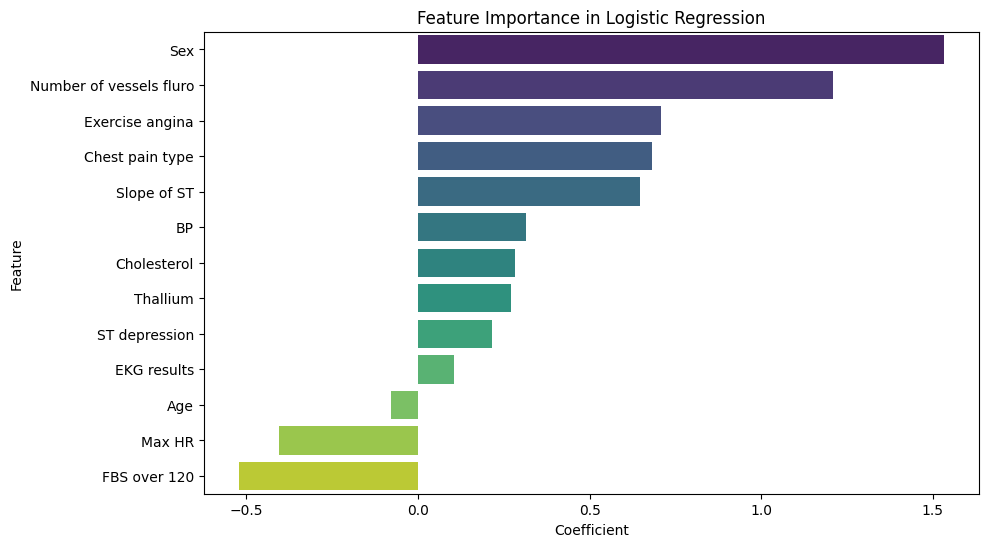

In [8]:
# Extract and analyze model coefficients
coefficients = model.coef_[0]
feature_names = X.columns

# Create a DataFrame for better visualization
coeff_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)
print(coeff_df)

# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df, palette='viridis')
plt.title('Feature Importance in Logistic Regression')
plt.show()
